# Mastering Twitter and Instagram with Python



In this notebook we will see how to master data analysis from social networks.

We will use data from **Twitter** and **Instagram**.

## Twitter
Let's see, first of all, how to interact with Twitter through the REST API.

The code you will see is "ready to use", so you can easily use and reuse this notebook with few modifications.

I will use a library, **tweepy**, which will allow us to search for messages that interest us and **pandas** to put our data in quality.

So we don't use the API provided directly by Twitter (it's still possible to do so), but a **wrapper** written and maintained by a community.

In object programming languages, a wrapper is "an object that contains other objects": we build a frame that makes the functions contained in a library available abroad, in an easy way. 

Let's go install everything we need for the lab...

*   tweepy
*   pandas



In [1]:
!pip install --user tweepy==3.3.0

Let's go import the modules we need for our work:
- numpy
- pandas
- tqdm 
- **tweepy**

In [2]:
import tweepy
import numpy as np
import pandas
from tweepy import OAuthHandler
from tqdm import tqdm_notebook as tqdm 


First, we have to authorize our "app", we use the keys we generated for this purpose.

We need the four values to authenticate with OAuth:
- consumer key
- consumer secret
- access token
- access secret


(specify your **keys**... )

In [3]:
consumer_key = 'Vzk6O5t967f1n4iz9iQcsQwhf'
consumer_secret = 'Q8sncdY1j85mwNitOqb5Spcg6U6uuZ0E2KNHHZEYF2J4DdCyVi'
access_token = '164224789-mFmU5YhessCNvubNojgfL605tbU0vh0NOna3HdQU'
access_secret = 'Ic5LNOH2QqxziSq4eTQdJvbXo3noTcQDUzCKXgFcdPzpC'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)




The variable **api** is now the starting point for all our operations with **Twitter**.

The **wait_on_rate_limit** parameter enables management of the client-side **rate_limit**. In this way we avoid *being blocked* for too much traffic.


For example, let's read a *Timeline*... let's take the user **Atalanta_BC**
(or the one you prefer)


In [4]:
timeline = api.user_timeline(screen_name = 'Atalanta_BC', count = 10, include_rts = True)
for status in timeline:
    print(status.text)
    print('-----------------------------------------------')

Esordio con vittoria (1-0 vs 🇪🇨) in @CopaAmerica per la #Colombia di Duván #Zapata (35') e @Luisfmuriel09 (in panch… https://t.co/EG62IxiVem
-----------------------------------------------
𝙎𝙀𝘼𝙎𝙊𝙉 𝙍𝙀𝙒𝙄𝙉𝘿 ⏪ @Luisfmuriel09 

CHE STAGIONE! 😍 Difficile trovare un aggettivo per descriverla... Aiutateci voi 😉💬… https://t.co/DcOFehI4FT
-----------------------------------------------
Non basta l'assist di #Malinovskyi per il momentaneo 2-2: la spunta l'#Olanda di @Dirono al termine di una partita… https://t.co/g65MhEjRpp
-----------------------------------------------
𝙎𝙀𝘼𝙎𝙊𝙉 𝙍𝙀𝙒𝙄𝙉𝘿 ⏪ Aleksey #Miranchuk

Un impatto importante nella sua 1ª stagione in nerazzurro! 🤩 E il meglio deve a… https://t.co/iZNVMSumTg
-----------------------------------------------
We're very relieved to hear that Christian #Eriksen is in a stable condition.
The whole Atalanta family is with you… https://t.co/QV5Peck0u4
-----------------------------------------------
Siamo davvero sollevati nell'apprendere che le condizion

For each status (== tweet) we have the complete Json through the `._json` method.


We introduce a new library *Pretty Print* **pprint**: it is very useful to quickly view the content of a **dict**.

In [5]:
timeline = api.user_timeline(screen_name = 'Atalanta_BC', count = 1, include_rts = True)
import pprint
for status in timeline:
    pprint.pprint(status._json)
    print('-----------------------------------------------')

{'contributors': None,
 'coordinates': None,
 'created_at': 'Mon Jun 14 18:04:18 +0000 2021',
 'entities': {'hashtags': [{'indices': [56, 65], 'text': 'Colombia'},
                           {'indices': [75, 82], 'text': 'Zapata'}],
              'symbols': [],
              'urls': [{'display_url': 'twitter.com/i/web/status/1…',
                        'expanded_url': 'https://twitter.com/i/web/status/1404499955713183746',
                        'indices': [117, 140],
                        'url': 'https://t.co/EG62IxiVem'}],
              'user_mentions': [{'id': 3159711265,
                                 'id_str': '3159711265',
                                 'indices': [36, 48],
                                 'name': 'Copa América',
                                 'screen_name': 'CopaAmerica'},
                                {'id': 978759314096709632,
                                 'id_str': '978759314096709632',
                                 'indices': [91, 105],
   

### Search

Let's look for all tweets related to **#RecoveryPlan**
(or you can specify a search to your liking)

We use the bee `.search` which provides these parameters:
- `q` the query string to submit to Twitter
- `count` the status number to return 
- `max_id` returns only tweets that have id greater than `since_id`.

Let's collect 10,000 status and go save them in a list.

In [6]:
query = 'RecoveryPlan'
searched_tweets = []
last_id = -1
max_tweets = 10000
while len(searched_tweets) < max_tweets:
    count = max_tweets - len(searched_tweets)
    try:
        new_tweets = api.search(q=query, count=100, max_id=str(last_id - 1))
        # If I've reached the end of the search then I'm done
        # immediately the cycle while
        if not new_tweets:
            break
        # added the data found to the list
        searched_tweets.extend(new_tweets)
        # retrieve the last id found
        last_id = new_tweets[-1].id
    except tweepy.TweepError as e:
        print(e)
        break

In [7]:
len(searched_tweets)

827

Okay, we have recovery about **1,000** status.

Let's see how we can use them for our analysis. We use, as always, `Pandas`...

Why?
What's a `Pandas`?

### Pandas

Now let's create a dataframe with the tweets we're looking for.

Let's try to extract the most significant information and create a dataset for our analysis.



In [8]:
import pandas as pd
# Create our dict with our data
dict_ = {'id': [], 'user': [], 'date': [], 'text': [], 
         'favorite_count': [], 'hashtags': [], 
         'location': [], 'retweet': [], 'retweet_count': [], 'followers_count': [], 'in_reply_to_status_id':[], 'user_mentions':[]}
#
for status_j in searched_tweets:
    status = status_j._json
    dict_['id'].append(status['id'])
    dict_['user'].append(status['user']['screen_name'])
    dict_['hashtags'].append([hashtag['text'] for hashtag in status['entities']['hashtags']])
    dict_['user_mentions'].append([user_mention['screen_name'] for user_mention in status['entities']['user_mentions']])
    dict_['location'].append(status['user']['location'])
    dict_['followers_count'].append(status['user']['followers_count'])
    dict_['in_reply_to_status_id'].append(status['in_reply_to_status_id'])
    dict_['date'].append(status['created_at'])
    dict_['text'].append(status['text'])
    dict_['favorite_count'].append(status['favorite_count'])
    dict_['retweet_count'].append(status['retweet_count'])
    dict_['retweet'].append(status['retweeted'])


We create the dataframe **pandas** and order it for the *favorite_count* field.
The *.sort_values* method allows you to quickly order the data contained in a **DataFrame** pandas.

In [9]:
df = pd.DataFrame.from_dict(dict_, orient="columns")
df = df.set_index("id")
df.sort_values(by='favorite_count', inplace=True, ascending=False)
df.head(10)

,user,date,text,favorite_count,hashtags,location,retweet,retweet_count,followers_count,in_reply_to_status_id,user_mentions
id,,,,,,,,,,,
1403043577287094272,ZuzanaCaputova,Thu Jun 10 17:37:10 +0000 2021,"Supporting green, digital but also fair &amp; ...",299,[],Slovenská republika,False,26,105328,NaN,[]
1403276787413622784,DantiNicola,Fri Jun 11 09:03:52 +0000 2021,Ci penso e ci ripenso ma proprio non riesco a ...,144,[Meloni],,False,53,6805,NaN,[]
1402315235445383184,mara_carfagna,Tue Jun 08 17:23:00 +0000 2021,Tutti i miei auguri agli 8572 professionisti c...,98,[],,False,20,226997,NaN,[]
1403064489117900800,NadiaCalvino,Thu Jun 10 19:00:16 +0000 2021,Very interesting conversation with @hubertus_h...,41,[],,False,11,67626,NaN,"[hubertus_heil, theJagmeetSingh, DPZ_Berlin]"
1402158380043714560,amendolaenzo,Tue Jun 08 06:59:43 +0000 2021,"Ieri a #Trieste con @francescorusso, in visita...",29,[Trieste],,False,10,16935,NaN,[francescorusso]
1402191948652466177,CISLFoggia,Tue Jun 08 09:13:06 +0000 2021,#8giugno Esecutivo #Cisl #Foggia con SegrGen #...,29,"[8giugno, Cisl, Foggia, Puglia, FNP]",Foggia,False,17,1775,NaN,"[CastellucciAnto, TuriFilippo, CostantinoCisl]"
1403676919758004224,mov24agosto,Sat Jun 12 11:33:51 +0000 2021,Sarà l’#Europa a fare giustizia? È la battagli...,28,"[Europa, Sud, RecoveryPlan]",,False,7,1343,NaN,[]
1401898639639842820,dukana2,Mon Jun 07 13:47:36 +0000 2021,#Recoveryplan-#Eni✔️cosa c'è davvero per la tr...,20,"[Recoveryplan, Eni]",,False,16,12029,NaN,[]
1402957584852832258,CISLFoggia,Thu Jun 10 11:55:28 +0000 2021,#10giugno 🗞GazzettadelMezzogiorno ‘#RecoveryPl...,20,"[10giugno, RecoveryPlan, Lavoro]",Foggia,False,16,1775,NaN,[CastellucciAnto]


In [10]:
df.count()

user                     827
date                     827
text                     827
favorite_count           827
hashtags                 827
location                 827
retweet                  827
retweet_count            827
followers_count          827
in_reply_to_status_id     19
user_mentions            827
dtype: int64



We save the dataset thus obtained so that it can also be handled with other tools (e.g. **Talend**).



In [11]:
df.to_csv('sc_twitter.csv')

### Hashtag analysis

Let's go pull out the hashtags and try to put them on a list.

In [12]:
list_hashtag_strings = []
for entry in df.hashtags:
    for hashtag in entry:
        list_hashtag_strings.append(hashtag.strip().lower().replace(' ',','))
list_hashtag_strings

['meloni',
 'trieste',
 '8giugno',
 'cisl',
 'foggia',
 'puglia',
 'fnp',
 'europa',
 'sud',
 'recoveryplan',
 'recoveryplan',
 'eni',
 '10giugno',
 'recoveryplan',
 'lavoro',
 'recoveryplan',
 'memberstates',
 'future',
 'anpalservizi',
 '10giugno',
 'rifiuti',
 'speciali',
 'ispra',
 'transizioneecologica',
 'ecologia',
 'lecce',
 'pes',
 'recoveryplan',
 'opportunità',
 'pandemic',
 'energie',
 'rinnovabili',
 'drogeno',
 'hightech',
 'elettronica',
 'italia',
 'recoveryplan',
 'europa',
 'cingol',
 'eni',
 'draghi',
 'transizione',
 'tuttamafia',
 'basilicata',
 'rifiutispeciali',
 'recoveryplan',
 'affaricostituzionali',
 'ambiente',
 'conforma',
 'board',
 'recoveryplan',
 'affaricostituzionali',
 'ambiente',
 'recovery',
 'rrf',
 'recoveryplan',
 'recoveryplan',
 'greenwashing',
 'rivoluzioneverde',
 'rifiuti',
 'rinnovabili',
 'impatto',
 'rinnovabili',
 'idrogeno',
 'hightech',
 'elettronica',
 'recoveryplan',
 'giovannitria',
 'meloni',
 'recoveryplan',
 'giornatamondialedegl

Let's group the hashtags, move them to a DataFrame and count them by looking for the most common ones.

To do this we use the `groupby` method of pandas.

In [13]:
hashtag = pd.DataFrame(list_hashtag_strings)
hashtag.columns = ['hashtag']
df_hashtag = hashtag.groupby(['hashtag'])['hashtag'].count().sort_values(ascending=False)
df_hashtag.head(20)


hashtag
recoveryplan    345
draghi           93
figliuolo        68
vaccini          68
menomale         68
meloni           58
eni              36
rinnovabili      30
10giugno         27
ambiente         25
hightech         24
8giugno          22
pandemic         21
green            21
lavoro           20
basilicata       20
energie          19
recoveryfund     19
cisl             18
fnp              18
Name: hashtag, dtype: int64

We save the results in two files
- the first file will contain the hashtag list
- the second file will contain the relationship between status and hashtag

In [14]:
df_hashtag.to_csv('sc_hashtag.csv', header=True)

In [15]:
status_hashtag = []
for status_id, entry in df.iterrows():
    for hashtag in entry['hashtags']:
        status_hashtag.append({'id': status_id, 'hashtag': hashtag.strip().lower()})

In [16]:
df_status_hashtag = pd.DataFrame(status_hashtag)
df_status_hashtag.set_index(['id','hashtag'])
df_status_hashtag.to_csv('sc_hashtag_status.csv', header=True)

### Wordcloud

Let's try some visualization libraries in **Python**.
One of the most used (and perhaps least useful) ways to display text is WordCloud.

Let's install the `wordcloud` library.

In [17]:
!pip install --user wordcloud
!pip install --user matplotlib

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

We create a list of hashtags by concatenating all the elements of the original list and separating them with a space.

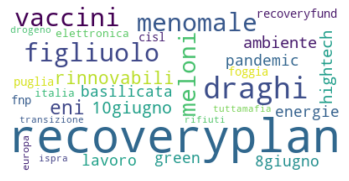

In [19]:
all_hashtags = ' '.join(list_hashtag_strings)
wordcloud = WordCloud(max_font_size=70, max_words=30, 
                      background_color="white", 
                      collocations=False).generate(all_hashtags)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Locations 



In [20]:
counts = df.groupby('location').size()  
df_location = pd.DataFrame(counts, columns = ['size'])    

# we only keep significant cases
df_location = df_location[df_location['size']>3] 
df_location = df_location.sort_values(by='size', ascending=False)
df_location.head(10)

,size
location,
,339
Italia,33
"Roma, Lazio",31
Roma,24
"Brussels, Belgium",19
Milano,11
Bruxelles,11
Brussels,8
Europe,6


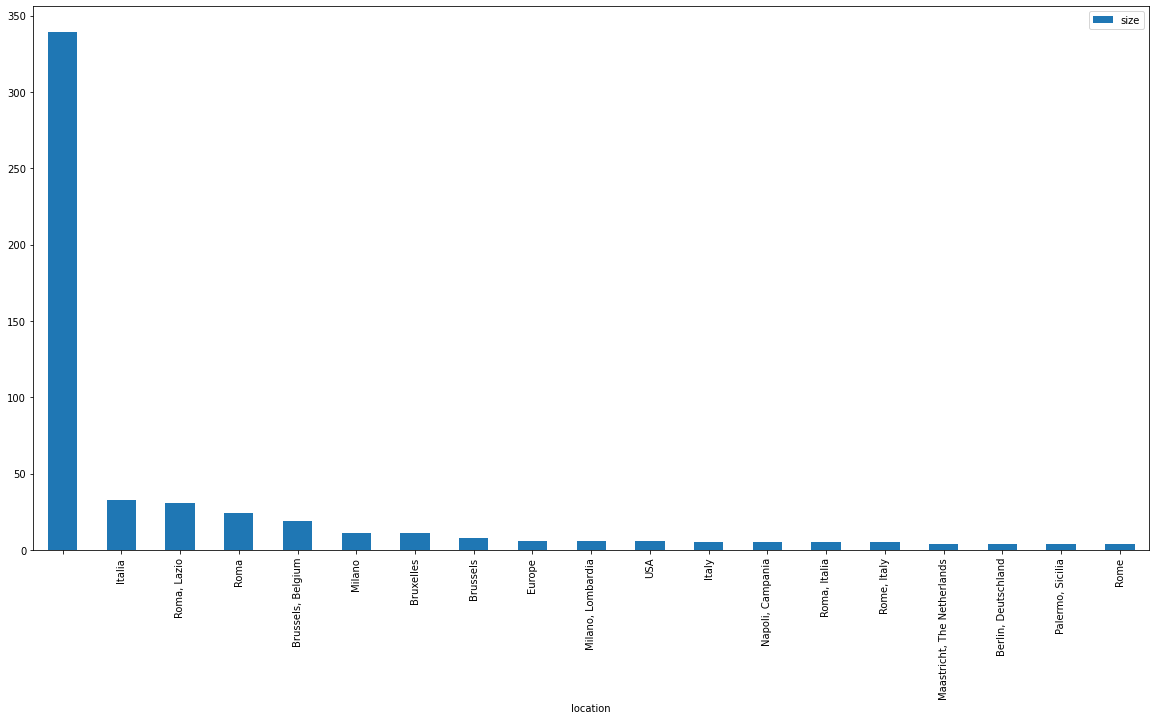

In [21]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
df_location.plot(kind='bar')

### Users

We use the same technique to analyze the **users**.

In [22]:
counts = df.groupby('user').size()  
df_user = pd.DataFrame(counts, columns = ['size'])    

df_user = df_user[df_user['size']>3] 
df_user = df_user.sort_values(by='size', ascending=False)
df_user.head(10)

,size
user,
emanuelebonini,15
dukana2,12
eunewsit,10
pborghilivorno,8
Frances44499292,8
RepubblicaAF,8
dossettionlus,8
k4innovation,5
ISPRA_Press,5


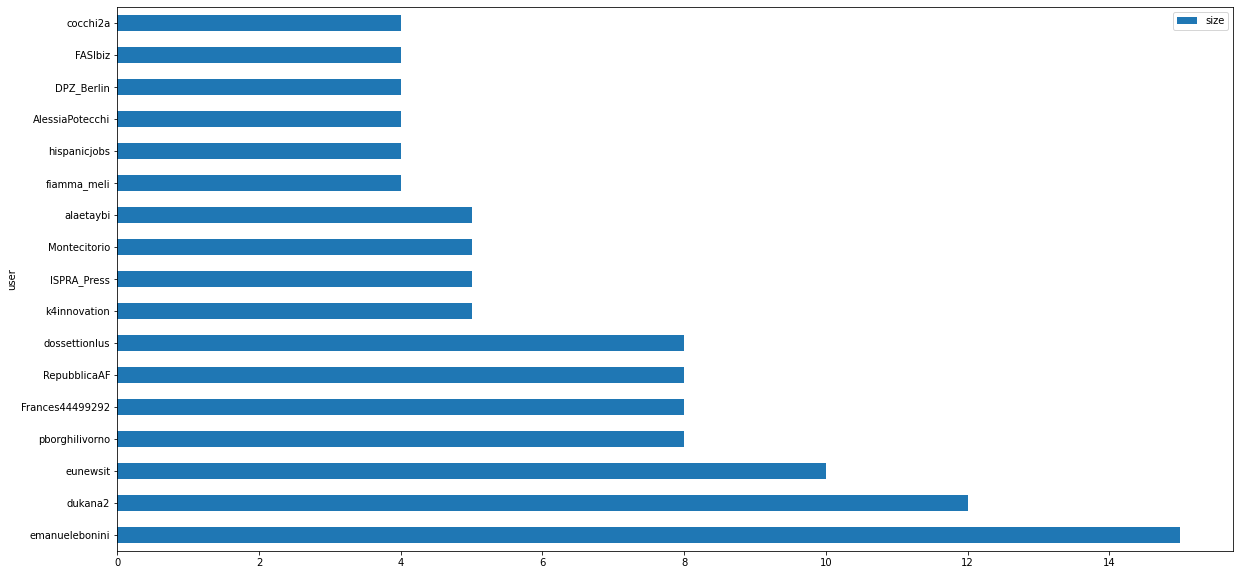

In [23]:
df_user.plot(kind='barh')

### User Mentions



In [24]:
list_mentions = []
for entry in df.user_mentions:
    for mention in entry:
        list_mentions.append(mention)
list_mentions

['hubertus_heil',
 'theJagmeetSingh',
 'DPZ_Berlin',
 'francescorusso',
 'CastellucciAnto',
 'TuriFilippo',
 'CostantinoCisl',
 'CastellucciAnto',
 'GabrielMariya',
 'TvRicicla',
 'MiTE_IT',
 'ConfindustriaLe',
 'unwomeneca',
 'EuRIC_Recycling',
 'GiuseppeGuerin1',
 'CECOP_coops',
 'NadiaCalvino',
 'OlafScholz',
 'Confedilizia_',
 'Andrea_V_73',
 'levrierog',
 'MaurilioVitto',
 'CCKKI',
 'teresariccio61',
 'CalaminiciM',
 'BedaRomano',
 'sole24ore',
 'lauranaka',
 'NadiaCalvino',
 'AngeloBonelli1',
 'EleonoraEvi',
 'NadiaCalvino',
 'SNPAmbiente',
 'TvRicicla',
 'GabrielMariya',
 'EU_Commission',
 'conteDartagnan',
 'sole24ore',
 'FinancialTimes',
 'ftlive',
 'SkyTG24',
 'euric',
 'assofermet',
 'presentazione',
 'ISPRA_Press',
 'giuslit',
 'sole24ore',
 'carloalberto',
 'RepubblicaAF',
 'GioMelandri',
 'LaCastelliM5s',
 'SimonaMalpezzi',
 'sole24ore',
 'carano_a',
 'ManuelaPerrone',
 'SimonaMalpezzi',
 'SergioSiniga',
 'hashtagtb_',
 'BeppeRusso_',
 'YouTube',
 'depmyfav7',
 'luigidima

In [25]:
mentions = pd.DataFrame(list_mentions)
mentions.columns = ['user']
mentions = mentions.groupby('user')['user'].count()
mentions.head()

user
2021PortugalEU    1
24Eventi          1
2didenari         1
5g_Italia         3
AGallione         2
Name: user, dtype: int64

In [26]:
df_mentions = pd.DataFrame(mentions)    
df_mentions.head()

df_mentions.columns = ['count']
df_mentions = df_mentions[df_mentions['count']>=15] 
df_mentions = df_mentions.sort_values(by='count', ascending=False)
df_mentions.head(10)


,count
user,
GalloBelmax,68
DantiNicola,53
dukana2,50
CastellucciAnto,35
CISLFoggia,33
NadiaCalvino,25
k4innovation,22
ZuzanaCaputova,21
mara_carfagna,20


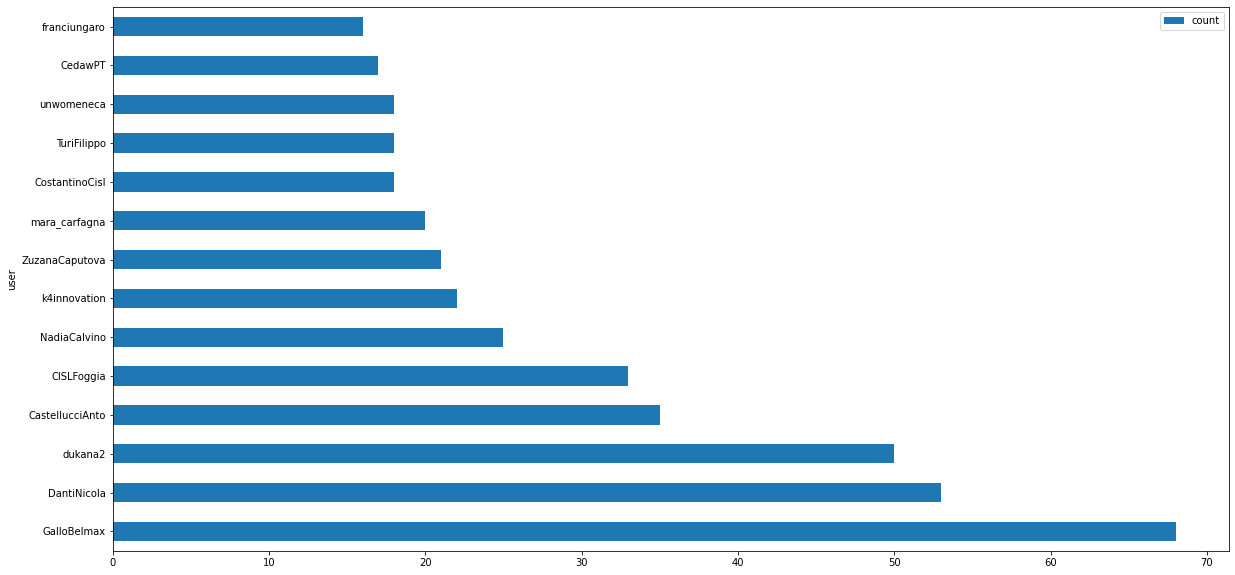

In [27]:
df_mentions.plot(kind='barh')

## Instagram


Let's see what you can do with Instagram.
There are several libraries but they are all very experimental. Something can still be done.

Let's try using **instaloader**.

In [19]:
!pip3 install instaloader==4.6

     |████████████████████████████████| 51kB 3.0MB/s 
  Created wheel for instaloader: filename=instaloader-4.6-cp37-none-any.whl size=51898 sha256=d2b5410dba4aac712167e3f0debe471a0d9ab67eeb6f610067bcfbb52cecda1f
  Stored in directory: /root/.cache/pip/wheels/7d/66/14/5a70c7a53f9cb1308e3d0810785ee8be399449b7e585bb2ebd
Successfully built instaloader
  Found existing installation: instaloader 4.7
    Uninstalling instaloader-4.7:
      Successfully uninstalled instaloader-4.7


In [20]:
from itertools import islice
from math import ceil

import instaloader

To download the profile of a user, from command line



```
instaloader profile esselunga
```



(found at this link https://instaloader.github.io/basic-usage.html 
all documentation for command line execution)


```
instaloader profile [profile....]

```
To create a corpus of images:

instaloader --no-videos --no-metadata-json --no-captions "#running"


I am now looking for all the posts with the hashtag **unimib** of June 2021.
I use `dropwhile` and `takewhile` that allow me to easily filter the data.


Please specify your username...

In [21]:
!instaloader -l mauropelucchi

Loaded session from /root/.config/instaloader/session-mauropelucchi.
Logged in as mauropelucchi.
Saved session to /root/.config/instaloader/session-mauropelucchi.
No targets were specified, thus nothing has been downloaded.


In [ ]:
from datetime import datetime
from itertools import dropwhile, takewhile

L = instaloader.Instaloader()
L.load_session_from_file("mauropelucchi")
HASHTAG = 'unimib'

posts = instaloader.NodeIterator(
    L.context, "9b498c08113f1e09617a1703c22b2f32",
    lambda d: d['data']['hashtag']['edge_hashtag_to_media'],
    lambda n: instaloader.Post(L.context, n),
    {'tag_name': HASHTAG},
    f"https://www.instagram.com/explore/tags/{HASHTAG}/"
)

SINCE = datetime(2021, 6, 30)
UNTIL = datetime(2021, 6, 1)

for post in takewhile(lambda p: p.date > UNTIL, dropwhile(lambda p: p.date > SINCE, posts)):
    print(post.date)
    L.download_post(post, '#unimib')

I find all the data in the folder **#unimib** under the directory of my notebook

Let's now try to understand who are the most active and the least active followers of an Instagram account (let's take the month of May)

In [24]:

PROFILE = 'unimib'

profile = instaloader.Profile.from_username(L.context, PROFILE)

SINCE = datetime(2021, 6, 2)
UNTIL = datetime(2021, 6, 1)

likes = set()
print('Fetching likes of all posts of profile {}.'.format(profile.username))
posts = profile.get_posts()
for post in takewhile(lambda p: p.date > UNTIL, dropwhile(lambda p: p.date > SINCE, posts)):
    print(post)
    likes = likes | set(post.get_likes())


Fetching likes of all posts of profile unimib.
<Post CPk6DU9KCOz>


In [25]:
likes

{<Profile _.laurettaaa._ (1564805767)>,
 <Profile _.persy_ (1810844695)>,
 <Profile _13_nick (1684281975)>,
 <Profile __.alessia.__02_ (37344805976)>,
 <Profile __.enzaazne.__ (3304425925)>,
 <Profile ___saraaab (1673631658)>,
 <Profile __mirkoo (444266085)>,
 <Profile __moka__97 (1929017176)>,
 <Profile _alberto_villa_ (3670417578)>,
 <Profile _alexincubus_ (48272017783)>,
 <Profile _alice_aa (8701096010)>,
 <Profile _almaine (5730021317)>,
 <Profile _auroramarnini (11953487351)>,
 <Profile _elena_u.u (1575108123)>,
 <Profile _eli2100 (1568033943)>,
 <Profile _ettob_ (2137610035)>,
 <Profile _filipporutter (17688885521)>,
 <Profile _giorgiamore (713321393)>,
 <Profile _giuliaborghi (1413860505)>,
 <Profile _jo_2001 (2033210225)>,
 <Profile _labragonsss_ (3323987797)>,
 <Profile _luciarugel_ (1330449877)>,
 <Profile _maaryyyyy__ (1399032885)>,
 <Profile _margher (336224002)>,
 <Profile _martybellox_ (1418560085)>,
 <Profile _mrnobody_2008 (2460509754)>,
 <Profile _silvia.e.rosmarino_ (

In [26]:
SINCE = datetime(2021, 5, 2)
UNTIL = datetime(2021, 5, 1)

likes_5 = set()
print('Fetching likes of all posts of profile {}.'.format(profile.username))
posts = profile.get_posts()
for post in takewhile(lambda p: p.date > UNTIL, dropwhile(lambda p: p.date > SINCE, posts)):
    print(post)
    likes_5 = likes_5 | set(post.get_likes())


Fetching likes of all posts of profile unimib.


In [27]:
likes_5

set()

In [28]:
ghosts = likes_5 - likes

In [29]:
ghosts

set()

new users?

In [30]:
new = likes - likes_5

In [31]:
new

{<Profile _.laurettaaa._ (1564805767)>,
 <Profile _.persy_ (1810844695)>,
 <Profile _13_nick (1684281975)>,
 <Profile __.alessia.__02_ (37344805976)>,
 <Profile __.enzaazne.__ (3304425925)>,
 <Profile ___saraaab (1673631658)>,
 <Profile __mirkoo (444266085)>,
 <Profile __moka__97 (1929017176)>,
 <Profile _alberto_villa_ (3670417578)>,
 <Profile _alexincubus_ (48272017783)>,
 <Profile _alice_aa (8701096010)>,
 <Profile _almaine (5730021317)>,
 <Profile _auroramarnini (11953487351)>,
 <Profile _elena_u.u (1575108123)>,
 <Profile _eli2100 (1568033943)>,
 <Profile _ettob_ (2137610035)>,
 <Profile _filipporutter (17688885521)>,
 <Profile _giorgiamore (713321393)>,
 <Profile _giuliaborghi (1413860505)>,
 <Profile _jo_2001 (2033210225)>,
 <Profile _labragonsss_ (3323987797)>,
 <Profile _luciarugel_ (1330449877)>,
 <Profile _maaryyyyy__ (1399032885)>,
 <Profile _margher (336224002)>,
 <Profile _martybellox_ (1418560085)>,
 <Profile _mrnobody_2008 (2460509754)>,
 <Profile _silvia.e.rosmarino_ (

In [32]:
list_new = []
for profile in new:
    list_new.append({'profile': profile.username})

In [33]:
list_ghost = []
for profile in ghosts:
    list_ghost.append({'profile': profile.username})

In [35]:
import pandas as pd
pd.DataFrame(list_new).to_csv('new.csv')
pd.DataFrame(list_ghost).to_csv('ghost.csv')